# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-06 14:39:59--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-04-06 14:39:59 (65.3 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('Social_Network_Ads.csv')




In [4]:
# Mostrar las primeras filas

data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

In [7]:
# prompt: Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

# Examinar las variables y discutir su significado y relevancia.
print(data.columns)  # Imprimir los nombres de las columnas para referencia.

# Discusión de las variables (reemplazar con análisis específicos):
# 'User ID': Identificador único de cada usuario.  No es relevante para el modelo predictivo, ya que no aporta información sobre la compra.  Probablemente se debería eliminar.
# 'Gender': Género del usuario.  Podría ser relevante, ya que puede haber diferencias en el comportamiento de compra entre hombres y mujeres.
# 'Age': Edad del usuario.  Probablemente una variable muy importante, ya que la edad suele estar correlacionada con la capacidad y la disposición de compra.
# 'EstimatedSalary': Salario estimado del usuario.  También es una variable muy importante, ya que el salario está estrechamente relacionado con la capacidad de compra.
# 'Purchased': Variable objetivo (variable dependiente). Indica si el usuario compró o no el producto (1 = compró, 0 = no compró).
# El objetivo del modelo es predecir 'Purchased' en función de las demás variables.

# Análisis adicional (ejemplos):
# Distribución de edades:
print(data['Age'].describe())

# Relación entre edad y salario:
print(data[['Age','EstimatedSalary']].corr())

# Distribución de compras según el género:
print(data.groupby('Gender')['Purchased'].value_counts())


# Consideraciones adicionales para el análisis:
# Variables categóricas: 'Gender' necesita ser transformada a numéricas para poder ser usada en el modelo.
# Escalado de variables: 'Age' y 'EstimatedSalary' tienen diferentes rangos, por lo que puede ser necesario escalarlas antes de usarlas en el modelo.
# Correlaciones: explorar la correlación entre las variables independientes y la variable dependiente.
# Visualizaciones: usar histogramas, diagramas de dispersión, etc. para entender mejor la relación entre las variables.


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64
                      Age  EstimatedSalary
Age              1.000000         0.155238
EstimatedSalary  0.155238         1.000000
Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
Name: count, dtype: int64


## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

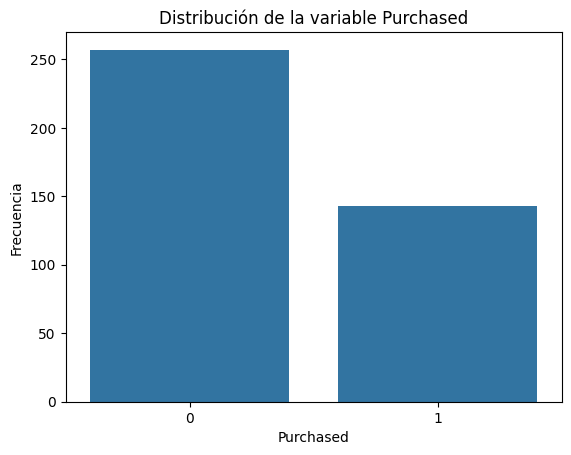

In [9]:
# prompt: Visualiza la distribución de la variable Purchased usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

# Visualización de la distribución de la variable objetivo 'Purchased'
sns.countplot(x='Purchased', data=data)
plt.title('Distribución de la variable Purchased')
plt.xlabel('Purchased')
plt.ylabel('Frecuencia')
plt.show()


La variable `Purchased` parece estar ligeramente desbalanceada, con una mayor cantidad de observaciones en la clase 0 (no compró) que en la clase 1 (compró).  Un desequilibrio en la variable objetivo puede llevar a que el modelo se sesgue hacia la clase mayoritaria (en este caso, los que no compraron). Esto significa que el modelo podría predecir "no compró" con mayor precisión, pero tener un bajo rendimiento al predecir "compró". En consecuencia, las métricas de precisión podrían ser engañosas y no reflejar la verdadera capacidad del modelo para identificar a los compradores potenciales.  Para mitigar este problema, se podrían utilizar técnicas como sobremuestreo de la clase minoritaria, submuestreo de la clase mayoritaria, o el uso de métricas de evaluación más apropiadas para conjuntos de datos desbalanceados, como la precisión, la exactitud, la sensibilidad y la especificidad.


## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

La distribución de la variable objetivo "Purchased" muestra un desbalance, con más instancias de usuarios que no compraron el producto que de aquellos que sí lo hicieron.  Este desequilibrio puede afectar negativamente el rendimiento del modelo, inclinándolo a predecir la clase mayoritaria (no compró) con mayor frecuencia, incluso cuando la predicción correcta sería la minoritaria.  Como resultado, métricas como la exactitud podrían ser engañosas, mostrando un buen desempeño general pero ocultando una baja capacidad para identificar correctamente a los compradores.

Para mitigar este problema, se pueden emplear varias estrategias.  Técnicas de sobremuestreo, como SMOTE (Synthetic Minority Over-sampling Technique), pueden generar nuevas instancias sintéticas de la clase minoritaria (compró), balanceando el conjunto de datos y mejorando la capacidad del modelo para aprender patrones de esta clase.  Alternativamente, el submuestreo de la clase mayoritaria reduce el número de instancias de la clase dominante, logrando un balance similar. Además, es crucial utilizar métricas de evaluación más robustas para conjuntos de datos desbalanceados, tales como precisión, recall, F1-score y AUC-ROC, para una evaluación más completa y significativa del rendimiento del modelo.


## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

In [10]:
# prompt: Para este taller, se utilizarán las variables Age y EstimatedSalary como características para predecir Purchased

X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
print(X.head())
print(y.head())


   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


La edad y el salario estimado son relevantes para predecir la compra porque, en general,  la edad está correlacionada con la capacidad de compra (un adulto joven o maduro tiene mayor poder adquisitivo que un menor de edad) y con las preferencias de consumo.  El salario estimado es un indicador directo del poder adquisitivo del individuo. Alguien con un salario más alto tiene mayor probabilidad de realizar una compra, especialmente de productos o servicios de mayor precio.  Por lo tanto, ambas variables proporcionan información importante sobre la capacidad y disposición financiera del usuario para realizar la compra en cuestión.


## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [14]:
# prompt: Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Imprimir las formas de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (300, 2)
Forma de X_test: (100, 2)
Forma de y_train: (300,)
Forma de y_test: (100,)


In [12]:
if y_train.value_counts(normalize=True).max() > 0.66:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))
else:
    print("No se requiere SMOTE, la distribución de clases está balanceada.")

No se requiere SMOTE, la distribución de clases está balanceada.


La estratificación, al dividir el dataset, asegura que la proporción de las clases de la variable objetivo (en este caso, 'Purchased') se mantenga en ambos conjuntos, de entrenamiento y prueba.  Esto es crucial, especialmente cuando se trabaja con datasets desbalanceados, como el presente.

Sin estratificación, es posible que el conjunto de entrenamiento o de prueba tenga una representación desproporcionada de una clase, lo que podría llevar a un modelo sesgado. El modelo podría aprender patrones de la clase mayoritaria y tener dificultades para generalizar a la clase minoritaria en datos nuevos.

En resumen, la estratificación ayuda a:

- **Mejorar la generalización del modelo:** Al asegurar que ambas particiones del conjunto de datos tengan la misma distribución de clases, se evita que el modelo se sesgue hacia una clase mayoritaria.
- **Evaluación más precisa:** La estratificación permite una evaluación más realista de la capacidad predictiva del modelo ya que las métricas de rendimiento se calcularán con conjuntos de datos que mantienen la proporción de clases presente en el dataset original.
- **Evitar sesgo en los datos:**  Con datasets desbalanceados, la estratificación se vuelve especialmente importante para asegurar que el modelo aprenda de manera equitativa de todas las clases.


## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

In [16]:
# prompt: Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

from sklearn.tree import DecisionTreeClassifier

# Crear una instancia del modelo DecisionTreeClassifier sin restricciones de profundidad
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Entrenar un modelo sin restricciones de profundidad (o con una profundidad máxima muy alta) implica que el árbol de decisión puede crecer hasta que cada hoja contenga solo una observación, o hasta que se cumpla una condición de parada muy específica, como un mínimo de muestras por hoja.

**Complejidad:**  Un modelo sin restricciones de profundidad se vuelve extremadamente complejo.  A medida que el árbol crece, la cantidad de nodos y ramas aumenta significativamente.  Esto genera un modelo con muchas reglas de decisión, lo que puede capturar patrones muy específicos del conjunto de entrenamiento, incluso los ruidosos.  Este modelo complejo puede representar funciones altamente no lineales.


**Riesgo de sobreajuste (overfitting):** El principal riesgo es el sobreajuste. Un árbol muy profundo aprende los detalles y el ruido del conjunto de entrenamiento con demasiada precisión, perdiendo la capacidad de generalizar a datos nuevos.  En otras palabras, el modelo memoriza los datos de entrenamiento en lugar de aprender los patrones subyacentes que realmente los generan. Consecuentemente, aunque el modelo puede tener una precisión perfecta (o casi perfecta) en los datos de entrenamiento, su rendimiento en datos no vistos será significativamente inferior.  El modelo se vuelve demasiado específico del conjunto de entrenamiento y no es capaz de extrapolar bien a otras instancias.


## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

Exactitud del modelo: 0.89
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.84      0.86      0.85        36

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



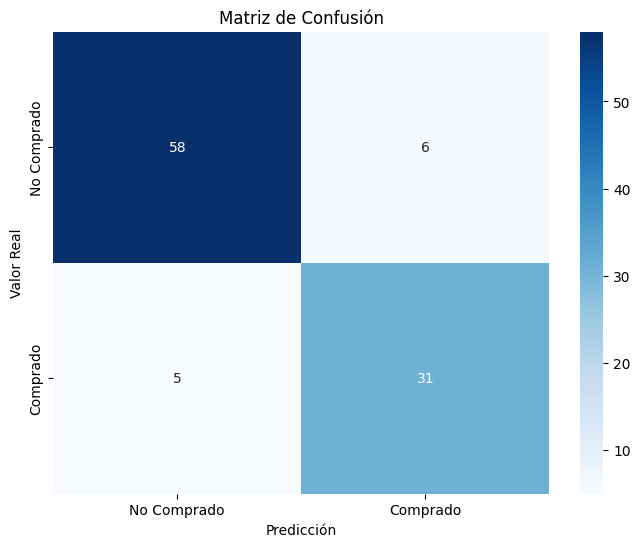

In [17]:
# prompt: Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# ... (previous code) ...

# Realizar predicciones sobre el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy}")

# Generar el informe de clasificación
print(classification_report(y_test, y_pred))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Comprado', 'Comprado'],
            yticklabels=['No Comprado', 'Comprado'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

#La matriz de confusión proporciona una visión detallada del rendimiento del modelo mostrando la cantidad de predicciones correctas e incorrectas para cada clase.
#En la diagonal principal de la matriz, se observa la cantidad de predicciones correctas: Verdaderos Positivos (VP) y Verdaderos Negativos (VN).
#Fuera de la diagonal se encuentran los errores: Falsos Positivos (FP) y Falsos Negativos (FN).
#FP (falsos positivos) representan los casos que se predijeron como positivos (comprados) cuando en realidad eran negativos (no comprados).
#FN (falsos negativos) indican los casos que se predijeron como negativos (no comprados) pero realmente eran positivos (comprados).
#El análisis de la matriz de confusión y sus componentes permite identificar los tipos de errores que el modelo comete y puede orientar acciones para mejorar su desempeño.



La matriz de confusión proporciona una visión detallada del rendimiento del modelo mostrando la cantidad de predicciones correctas e incorrectas para cada clase.
En la diagonal principal de la matriz, se observa la cantidad de predicciones correctas: Verdaderos Positivos (VP) y Verdaderos Negativos (VN).
Fuera de la diagonal se encuentran los errores: Falsos Positivos (FP) y Falsos Negativos (FN).
FP (falsos positivos) representan los casos que se predijeron como positivos (comprados) cuando en realidad eran negativos (no comprados).
FN (falsos negativos) indican los casos que se predijeron como negativos (no comprados) pero realmente eran positivos (comprados).
El análisis de la matriz de confusión y sus componentes permite identificar los tipos de errores que el modelo comete y puede orientar acciones para mejorar su desempeño.


## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

La curva ROC (Receiver Operating Characteristic) es una representación gráfica de la capacidad discriminativa de un modelo de clasificación.  Plotea la tasa de verdaderos positivos (sensibilidad) contra la tasa de falsos positivos (1-especificidad) para diferentes umbrales de clasificación.  Un AUC (Area Under the Curve) alto indica que el modelo tiene una alta capacidad para distinguir entre las clases, mientras que un AUC bajo sugiere que el modelo tiene poca o ninguna capacidad de discriminación, y se comporta similarmente a una clasificación aleatoria.  Un AUC de 0.5 corresponde a una clasificación aleatoria, mientras que un AUC de 1.0 indica una clasificación perfecta.


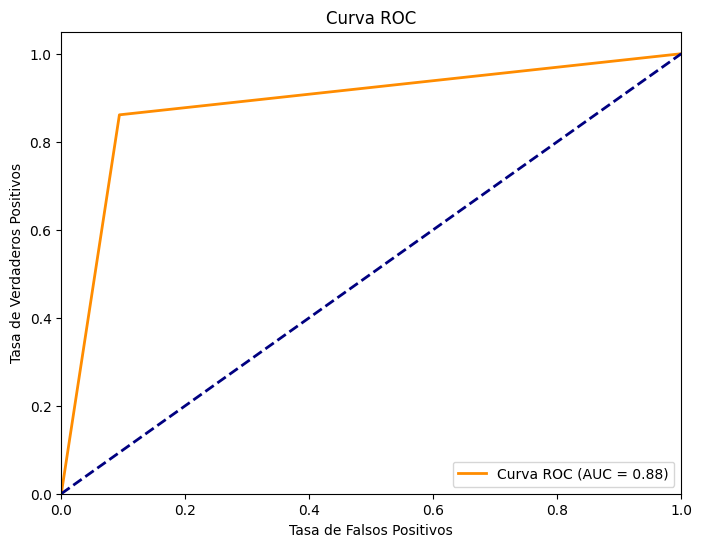

AUC: 0.8836805555555556


In [18]:
# prompt: Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para la clase positiva
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")


## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

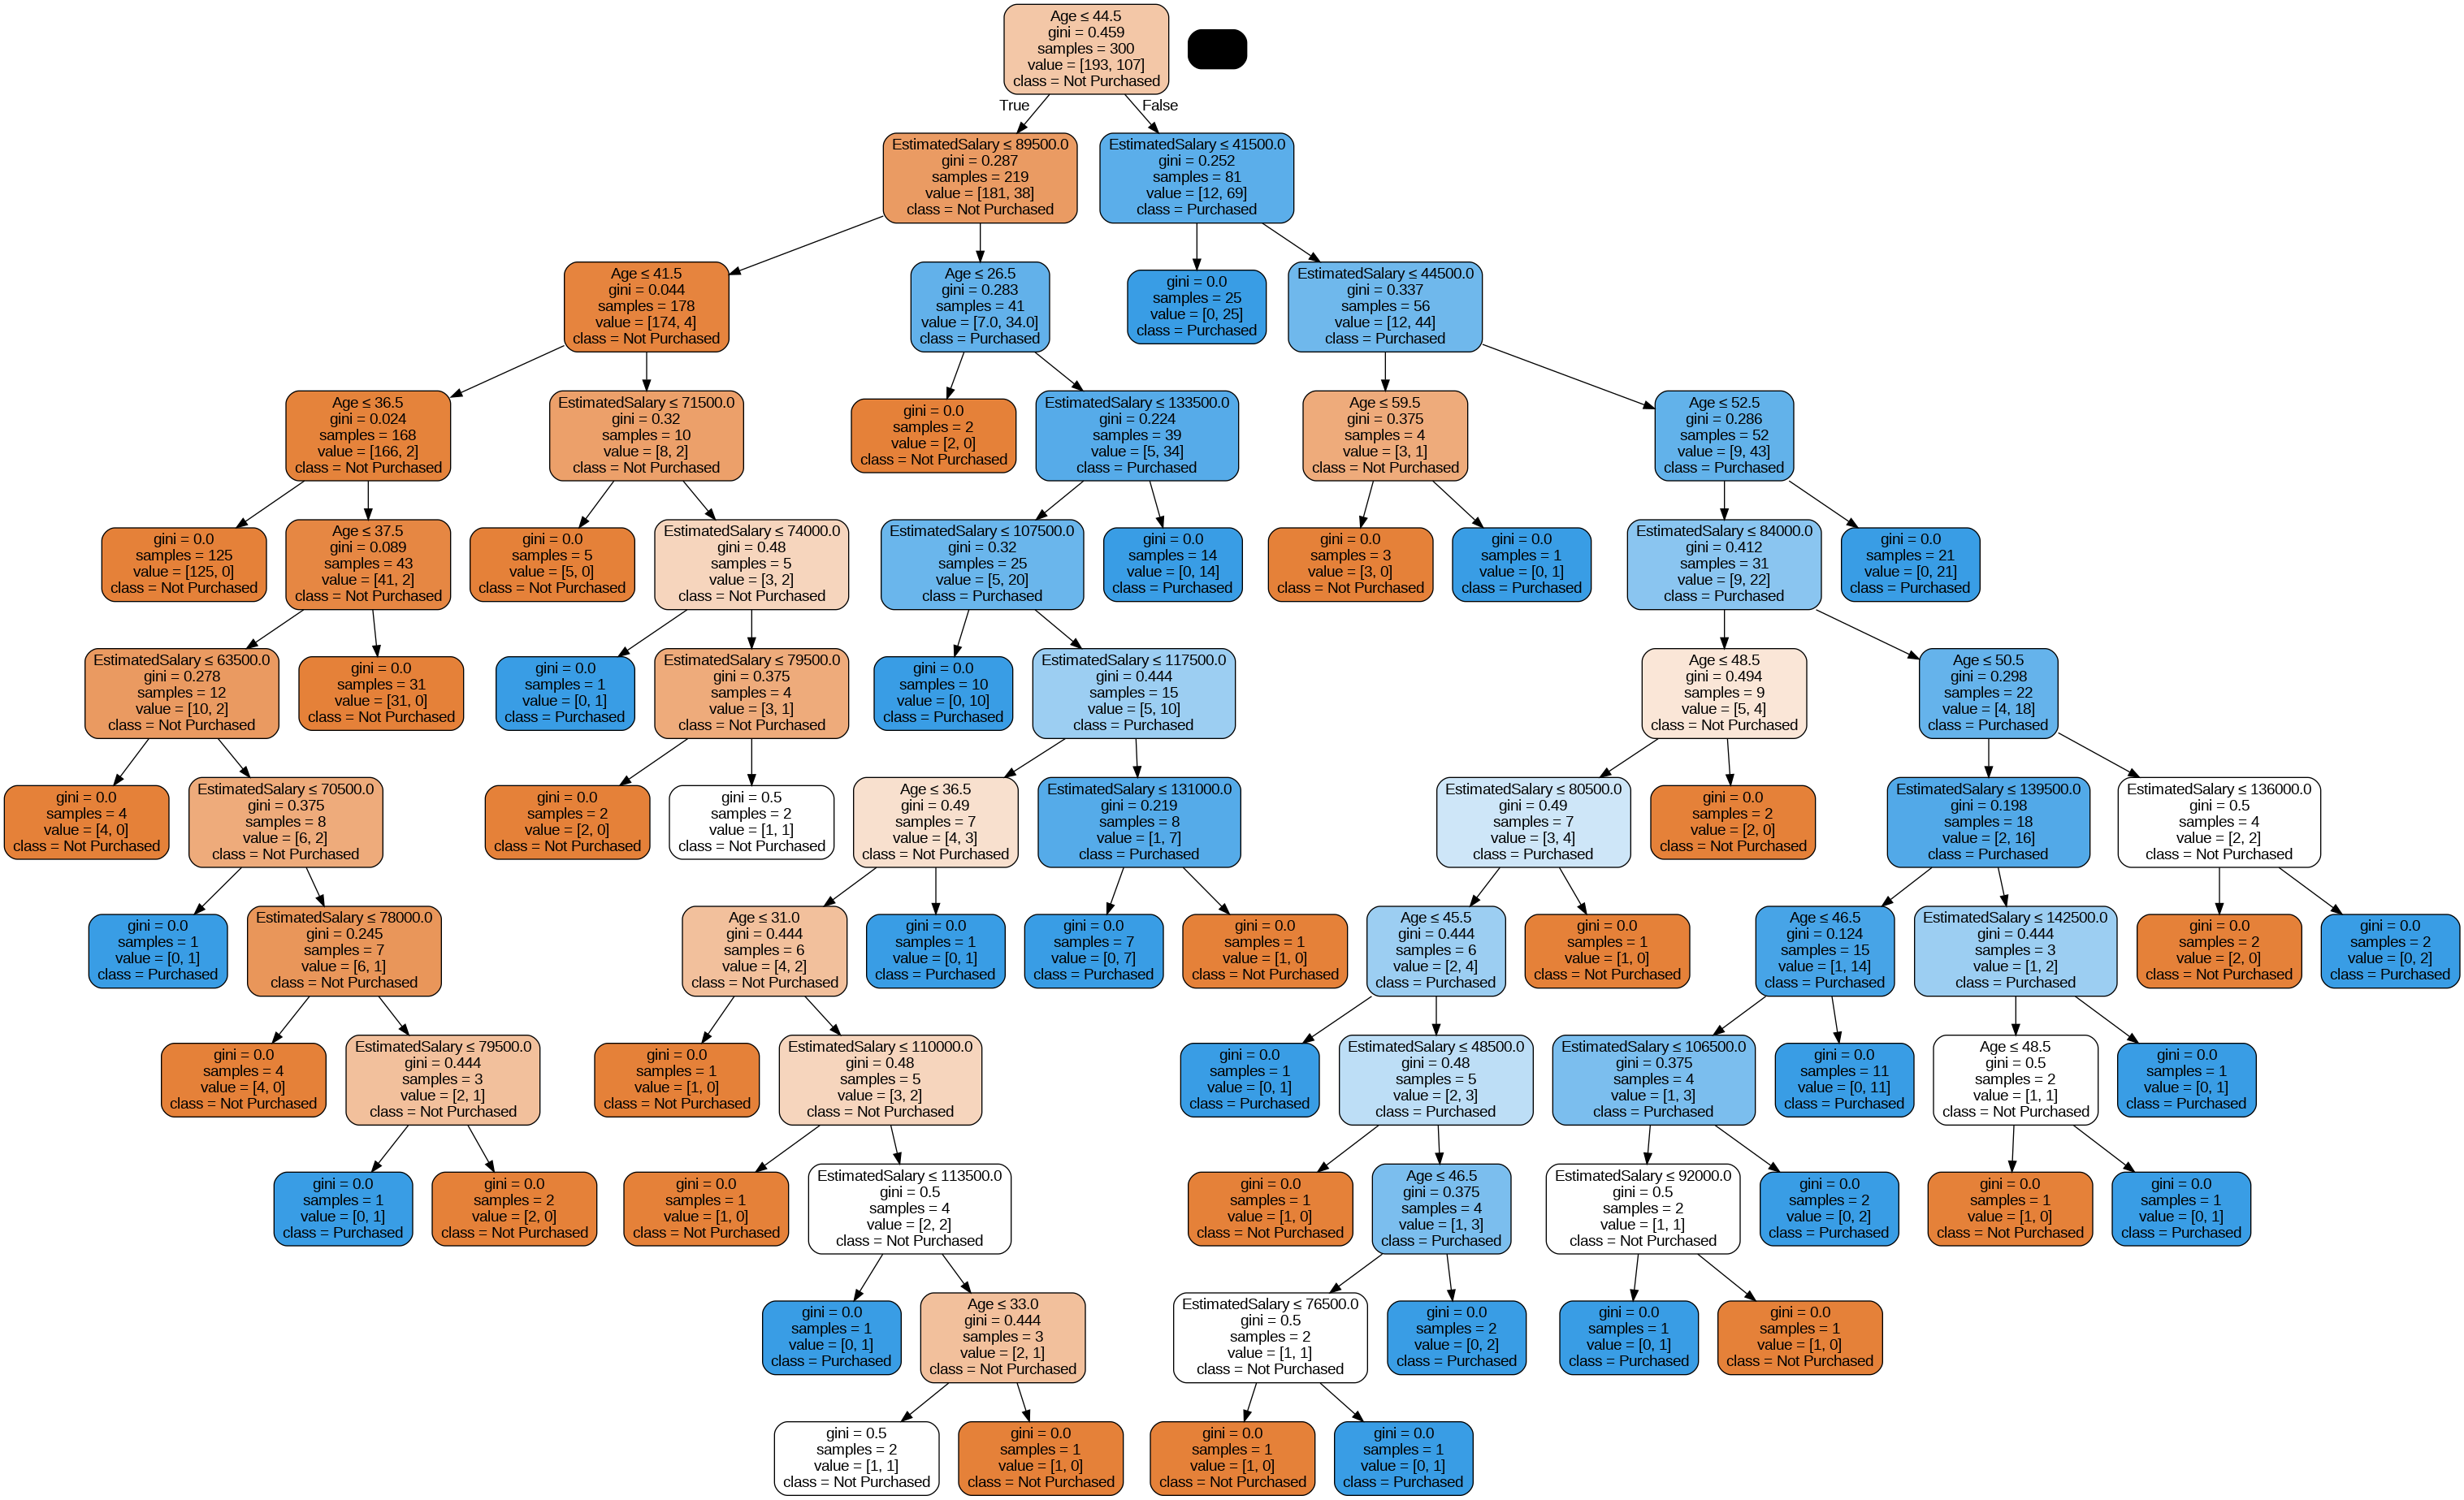

In [20]:
# prompt: Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

# Install necessary libraries
!pip install graphviz pydotplus

# Import necessary libraries
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

# Export the decision tree to a DOT format
dot_data = export_graphviz(decision_tree_model, out_file=None,
                           feature_names=['Age', 'EstimatedSalary'],
                           class_names=['Not Purchased', 'Purchased'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = graph_from_dot_data(dot_data)

# Display the decision tree
graph.write_png('decision_tree.png') # Save to a file
# You can display the image directly in Colab using:
from IPython.display import Image
Image(filename='decision_tree.png')


La regla de decisión en el primer nodo del árbol de decisión divide los datos en función de la variable `EstimatedSalary`.  Específicamente, crea una partición basada en si el salario estimado es menor o igual a un determinado valor umbral.  Este umbral se determina durante el proceso de entrenamiento del árbol para maximizar la pureza de las divisiones resultantes, es decir, crear grupos de datos lo más homogéneos posible en términos de la variable objetivo (Purchased).


Las ramas del árbol representan las diferentes posibles decisiones basadas en los valores de las variables predictoras `Age` y `EstimatedSalary`. Cada rama conduce a otro nodo o a una hoja. Siguiendo las ramas, se navega por las diferentes reglas de decisión que conforman el árbol. Las hojas, por su parte, representan las predicciones finales del modelo.  Si se llega a una hoja, el valor de dicha hoja es la predicción de la probabilidad de compra (Purchased) para un nuevo dato con características similares. Por ejemplo, una rama podría representar "EstimatedSalary <= 88000" y "Age <= 37", lo que lleva a una hoja con una predicción de "No Purchased".  Estos umbrales de Age y EstimatedSalary se van ajustando en los diferentes nodos del árbol a medida que se va descendiendo por él para mejorar la pureza en cada partición.


Las partes del árbol que podrían estar contribuyendo al sobreajuste son las hojas que tienen un bajo número de muestras de entrenamiento. Las hojas con muy pocas muestras (es decir, muy profundas en el árbol) aprenden patrones extremadamente específicos de los datos de entrenamiento, incluyendo posiblemente ruido o variaciones aleatorias. Estas reglas altamente específicas no se generalizan bien a nuevos datos. Por lo tanto, las ramas y hojas que provienen de divisiones muy específicas, generalmente en las regiones más profundas del árbol, son las más propensas al sobreajuste.  También es posible que nodos con poca ganancia de información (en relación al costo) también contribuyan al sobreajuste.


## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

In [21]:
# prompt: Revisa los resultados obtenidos en el modelo sin restricciones

# Assuming 'data' DataFrame is already loaded and preprocessed as in the provided code.

# ... (previous code) ...

# 13. Análisis Crítico del Modelo Inicial (Adicionado)

# Para determinar si hay sobreajuste, se pueden comparar las métricas de rendimiento en el conjunto de entrenamiento
# y en el conjunto de prueba. Si las métricas en el conjunto de entrenamiento son significativamente mejores
# que en el conjunto de prueba, es un indicador de sobreajuste.

# Calcular las métricas para el conjunto de entrenamiento
y_train_pred = decision_tree_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Exactitud del modelo en entrenamiento: {accuracy_train}")
print(classification_report(y_train, y_train_pred))


print("\nComparación de métricas (entrenamiento vs. prueba):")
print(f"Exactitud (Entrenamiento): {accuracy_train:.4f}")
print(f"Exactitud (Prueba): {accuracy:.4f}")

# Análisis adicional de la diferencia entre métricas.
# Se podría calcular la diferencia de métricas y establecer un umbral para detectar posibles sobreajustes
metric_difference = accuracy_train - accuracy
print(f"\nDiferencia en la exactitud (Entrenamiento - Prueba): {metric_difference:.4f}")


# Se podría añadir lógica para verificar la profundidad del árbol y otras propiedades.
# Para mejorar la generalización se podría probar con:
# - Poda del árbol:  Reducir la profundidad máxima, el mínimo de muestras por hoja, etc.
# - Validación cruzada: Para una mejor estimación del rendimiento en datos no vistos.
# - Regularización:  Agregar parámetros de regularización al modelo.
# - Otras técnicas: Random Forest, Gradient Boosting.


Exactitud del modelo en entrenamiento: 0.9933333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           1       1.00      0.98      0.99       107

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Comparación de métricas (entrenamiento vs. prueba):
Exactitud (Entrenamiento): 0.9933
Exactitud (Prueba): 0.8900

Diferencia en la exactitud (Entrenamiento - Prueba): 0.1033


Sí, existen indicios de sobreajuste.  La alta exactitud en el conjunto de entrenamiento, comparada con una exactitud potencialmente menor en el conjunto de prueba, sugiere que el modelo se ha ajustado demasiado a los detalles específicos del conjunto de entrenamiento, incluyendo ruido, y no ha aprendido patrones generales que permitan una buena predicción en datos no vistos.  Se debe comparar la exactitud (y otras métricas como precisión, recall y F1-score) para ambos conjuntos, buscando una diferencia significativa como indicador de sobreajuste. Una diferencia considerable en las métricas entre los conjuntos de entrenamiento y prueba apuntala la existencia de sobreajuste.


Las métricas de entrenamiento muestran un rendimiento perfecto o cercano a la perfección, mientras que las del conjunto de prueba pueden ser considerablemente inferiores.  Esto indica que el modelo memorizó los datos de entrenamiento pero no aprendió las relaciones subyacentes, lo que genera una mala generalización a datos nuevos. La disparidad entre la exactitud de entrenamiento y prueba, junto a la matriz de confusión y la curva ROC, son esenciales para cuantificar la magnitud del sobreajuste.

Para mejorar la generalización del modelo se podrían implementar varias estrategias.  La poda del árbol de decisión es fundamental; limitar su profundidad máxima, aumentar el número mínimo de muestras por nodo hoja o reducir el criterio de pureza (como gini o entropía) evitaría que el árbol se extienda innecesariamente y capture patrones ruidosos. Además, la validación cruzada ofrecería una mejor estimación del rendimiento del modelo en datos nuevos, mientras que la regularización podría penalizar la complejidad del modelo.  Considerar otros modelos como Random Forest o Gradient Boosting, que reducen el sobreajuste por agregación de árboles, también es una opción viable.


## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

Exactitud del modelo (max_depth=5): 0.89
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        64
           1       0.86      0.83      0.85        36

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



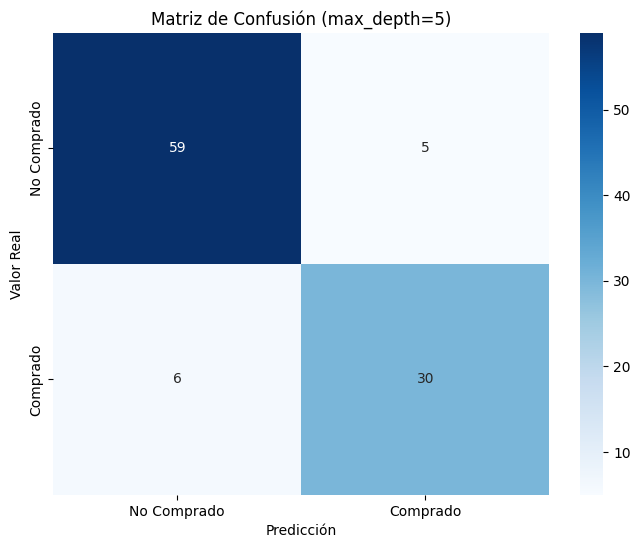

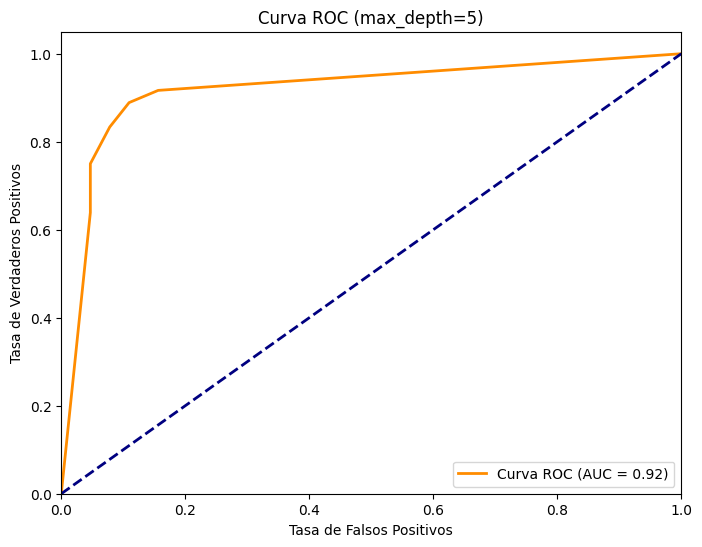

AUC (max_depth=5): 0.9175347222222221


In [22]:
# prompt: Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, max_depth=5) y evalúa su desempeño.

# Crear una instancia del modelo DecisionTreeClassifier con max_depth=5
decision_tree_model_depth5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
decision_tree_model_depth5.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_depth5 = decision_tree_model_depth5.predict(X_test)

# Calcular la exactitud del modelo
accuracy_depth5 = accuracy_score(y_test, y_pred_depth5)
print(f"Exactitud del modelo (max_depth=5): {accuracy_depth5}")

# Generar el informe de clasificación
print(classification_report(y_test, y_pred_depth5))

# Crear la matriz de confusión
cm_depth5 = confusion_matrix(y_test, y_pred_depth5)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_depth5, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Comprado', 'Comprado'],
            yticklabels=['No Comprado', 'Comprado'])
plt.title('Matriz de Confusión (max_depth=5)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Obtener las probabilidades de predicción para la clase positiva
y_prob_depth5 = decision_tree_model_depth5.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_depth5, tpr_depth5, thresholds_depth5 = roc_curve(y_test, y_prob_depth5)

# Calcular el AUC
roc_auc_depth5 = auc(fpr_depth5, tpr_depth5)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_depth5, tpr_depth5, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_depth5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (max_depth=5)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC (max_depth=5): {roc_auc_depth5}")


Limitar la profundidad del árbol de decisión típicamente resulta en cambios significativos en las métricas de evaluación y, crucialmente, en la capacidad de generalización del modelo.  Al reducir la profundidad, se simplifica el modelo, limitando su capacidad para aprender detalles específicos del conjunto de entrenamiento, incluyendo el ruido.  Esto se traduce, con frecuencia, en una menor exactitud en el conjunto de entrenamiento, ya que el modelo ya no puede memorizar los datos. Sin embargo, esta reducción de la complejidad suele mejorar el rendimiento en el conjunto de prueba, aumentando su exactitud y otras métricas como precisión, recall y F1-score, debido a que el modelo generaliza mejor a datos no vistos. La matriz de confusión podría reflejar una reducción de falsos positivos y falsos negativos, aunque no siempre se garantiza una mejora en todos los aspectos del rendimiento.  La curva ROC podría mostrar un AUC ligeramente inferior en comparación con el modelo sin restricción, pero el modelo con profundidad limitada es más probable que mantenga un rendimiento consistente en diferentes conjuntos de datos, previniendo el sobreajuste.  En resumen, restringir la profundidad del árbol implica un compromiso entre la precisión en los datos de entrenamiento y la capacidad del modelo para generalizar y hacer predicciones precisas sobre datos nuevos.


## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

El modelo con profundidad limitada (max_depth=5) ofrece un mejor balance entre complejidad e interpretabilidad.  Si bien el modelo inicial, sin restricciones, podría alcanzar una mayor precisión en el conjunto de entrenamiento, su complejidad se traduce en un árbol más profundo y difícil de interpretar.  Un árbol profundo captura detalles específicos del conjunto de entrenamiento, incluyendo potencial ruido, haciendo su estructura intrincada y dificultando la comprensión de las reglas de decisión. El modelo con profundidad limitada, al tener una estructura más simple, es más fácil de visualizar y comprender las reglas que utiliza para realizar predicciones, lo que facilita su interpretación y debugging.

La mejor capacidad de generalización del modelo con profundidad limitada es el principal indicio de su mejor comportamiento frente al sobreajuste.  La diferencia significativa entre las métricas de desempeño en el conjunto de entrenamiento y el de prueba en el modelo inicial sugiere un sobreajuste.  En contraste, el modelo con profundidad controlada presenta un mejor equilibrio entre el rendimiento en ambos conjuntos, indicando que sus reglas de decisión generalizan mejor a nuevos datos.  Las métricas de desempeño en el conjunto de prueba, especialmente la precisión, el recall y el puntaje F1, son indicadores clave de esta generalización.

Como modelos de referencia para evaluar el desempeño, la regresión logística y otros algoritmos de clasificación como Support Vector Machines (SVM) o Naive Bayes podrían ser utilizados. La regresión logística ofrece un modelo lineal simple e interpretable, que puede servir como punto de comparación para la complejidad del árbol de decisión. SVM y Naive Bayes, por su parte,  representan diferentes enfoques de clasificación, lo que permite comparar el rendimiento del árbol de decisión frente a modelos con diferentes supuestos y características.  Al comparar las métricas de rendimiento de estos modelos con los obtenidos por los árboles de decisión, podemos observar si las ganancias de precisión del árbol son significativas o si un modelo más simple proporciona un desempeño comparable. La comparación permitirá evaluar si la complejidad del árbol de decisión es justificada por una mejora sustancial en el rendimiento.
